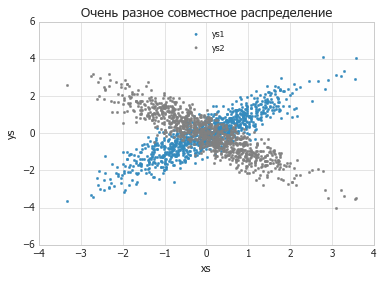

In [1]:
# -*- coding: utf-8 -*-
"""
Глава 10, рис. 3
"""

import math, random

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline  

mpl.style.use('ggplot')  
mpl.style.use('seaborn-whitegrid')  
mpl.rcParams['axes.facecolor'] = u'fefefe'
#mpl.rcParams.update({'font.family': 'Ubuntu Condensed'})   
mpl.rcParams.update({'font.family': 'Tahoma'})

# ИФР нормального распределения
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

# обратная ИФР нормального распределения
# (tolerance - это константа точности)
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """найти приближенную инверсию при помощи бинарного поиска"""

    # если нормальное распределение не стандартное, вычислить стандартное и нормализовать
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z, low_p = -10.0, 0            # normal_cdf(-10) = (очень близко к) 0 
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  = (очень близко к) 1 
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # взять середину
        mid_p = normal_cdf(mid_z)      # и значение ИФР в этом месте 
        if mid_p < p:
            # значение середины все еще слишком низкое, искать выше его
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # значение середины все еще слишком высокое, искать ниже 
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z
  
# случайная выборка из нормального распределения    
def random_normal():
    """возвращает случайную выборку из стандартного нормального распределения"""
    return inverse_normal_cdf(random.random())
    

def scatter():
    fig = plt.figure()
    
    xs = [random_normal() for _ in range(1000)]
    ys1 = [ x + random_normal() / 2 for x in xs]
    ys2 = [-x + random_normal() / 2 for x in xs]    
    
    plt.scatter(xs, ys1, marker='.', color="#348ABD", label='ys1')
    plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
    plt.xlabel('xs', fontsize=11)
    plt.ylabel('ys', fontsize=11)
    plt.legend(loc=9, fontsize=9)
    plt.title("Очень разное совместное распределение", fontsize=13) 
    plt.show()
    #fig.savefig("fig_10-3", dpi=300, bbox_inches='tight', facecolor='w') 
    
    
scatter()    